In [2]:
#define boundaries of Gulf of Maine
lat_range = [40.5,46]
lon_range = [-75,-64]

#identify months the indices of months to average; range is from 0 to 11 i.e. 0=jan, 1=feb etc...
month_index = np.array([1,2,3,4])

#handle one ensemble member at a time 
for ensemble_member in range(1,2):
    
    #keeping myself updated on progress
    print('Processing ensemble member '+str(ensemble_member))
    
    #load simulation SST
    if ensemble_member < 10:
        temp = xr.open_mfdataset('//climodes/data6/datasets/CESM_CAM5_LME/b.e11.BLMTRC5CN.f19_g16.00'+
                                 str(ensemble_member)+
                                 '.pop.h.TEMP.*.nc')['TEMP']
    else: 
        temp = xr.open_mfdataset('//climodes/data6/datasets/CESM_CAM5_LME/b.e11.BLMTRC5CN.f19_g16.0'+
                                 str(ensemble_member)+
                                 '.pop.h.TEMP.*.nc')['TEMP']
        
#     #center lon on 0 
#     temp.TLONG.values = xr.where(temp.TLONG.values>180,
#                                  temp.TLONG.values-360,
#                                  temp.TLONG.values)
   
    #keeping myself updated on progress
    print('    sptially filtering')
    #apply spatial filter 
#     temp_GoM = temp.where(np.logical_and(np.logical_and(temp.TLAT>lat_range[0], temp.TLAT<lat_range[1]),
#                                          np.logical_and(temp.TLONG>lon_range[0],temp.TLONG<lon_range[1])),
#                           np.nan)
#     lon_GoM = temp.TLONG.where(np.logical_and(np.logical_and(temp.TLAT>lat_range[0], temp.TLAT<lat_range[1]),
#                                               np.logical_and(temp.TLONG>lon_range[0],temp.TLONG<lon_range[1])),
#                                np.nan)
#     lat_GoM = temp.TLAT.where(np.logical_and(np.logical_and(temp.TLAT>lat_range[0], temp.TLAT<lat_range[1]),
#                                               np.logical_and(temp.TLONG>lon_range[0],temp.TLONG<lon_range[1])),
#                                np.nan)

Processing ensemble member 1
    sptially filtering


In [3]:
t = temp[0,:,:,:].values
depths = temp.z_t.values
lon = temp.TLONG
lat = temp.TLAT

In [4]:
bathymetry_map = np.zeros(t[0,:,:].shape)*np.nan

for i in range(0,bathymetry_map.shape[0]):
    for j in range(0,bathymetry_map.shape[1]):

        if np.logical_not(np.all(np.isnan(t[:,i,j]))):
            bathymetry_map[i,j] = depths[np.where(np.logical_not(np.isnan(t[:,i,j])))[0].argmax()]/100

In [40]:
bathymetry_map.shape

(384, 320)

In [36]:
bathymetry_map[100,100]

3133.4046875

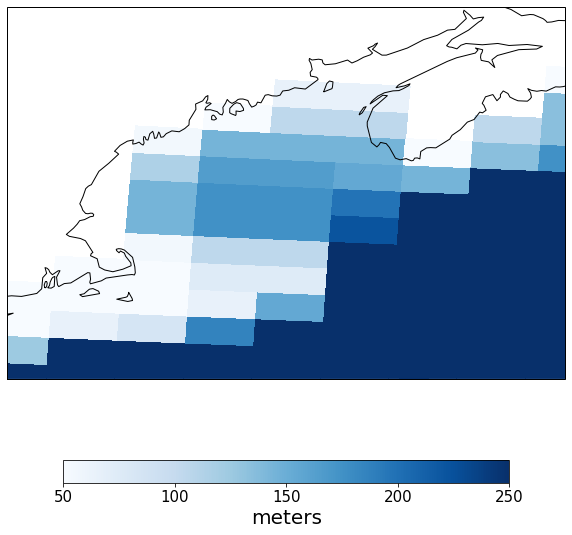

In [72]:
fig, ax = plt.subplots(figsize=(10,10))

ax = plt.subplot(projection= ccrs.PlateCarree())
im = ax.pcolormesh(lon,lat,bathymetry_map,transform=ccrs.PlateCarree(),vmin=50,vmax=250,cmap='Blues')

ax.set_extent([-72,-63,40,46])
ax.coastlines(resolution='50m')
cbar=plt.colorbar(im,orientation='horizontal',shrink=.8,ticks=np.arange(0,300,50))
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label='meters',size=20)


In [57]:
%run /home/ncresswell/Desktop/AzoresHigh_Nature/MyFunctions/DataAnalyzing.py
%run /home/ncresswell/Desktop/AzoresHigh_Nature/MyFunctions/DataProcessing.py
%run /home/ncresswell/Desktop/AzoresHigh_Nature/MyFunctions/Plotting.py
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def get_baseproj(ax=None,show_lon=False,show_lat=False):

    ax.set_global()
    ax.set_extent([-65,16,12,60])
    
    #gridlines for references
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                       linewidth=.5, color='k', linestyle='-',zorder=0)
    gl.xlocator = mticker.FixedLocator(np.arange(-100,40,20))
    gl.ylocator = mticker.FixedLocator(np.arange(-20,81,20))
    
    if show_lon:
        gl.xformatter = LONGITUDE_FORMATTER
        gl.xlabel_style = {'size': 20, 'color': 'k'}
    else:
        gl.xlabels_bottom = False
        
    if show_lat:
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 20, 'color': 'k'}
    else:
        gl.ylabels_right = False
    
    gl.xlabels_top = False
    gl.ylabels_left = False

    ax.coastlines(linewidth = 1,
                  resolution = '50m',
                  color = 'k',zorder=0);
    return ax